In [22]:
import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import matplotlib.animation as animation

from matplotlib import rc
rc('animation',html = 'jshtml')

In [6]:
# function for wavelet

def createComplexWavelet(time,freq,fwhm,phs = 0):
  sinepart  = np.exp(1j*(2*np.pi*freq*time +phs))
  gauspart = np.exp( (-4*np.log(2)*time**2) / (fwhm**2) )
  return sinepart*gauspart

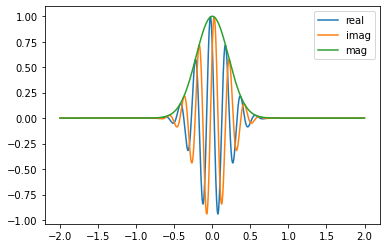

In [12]:
#create and visualize one wavelet

freq = 5
fwhm = .5
srate = 500

time = np.arange(-2*srate,2*srate)/srate

# create wavelet

wavelet = createComplexWavelet(time,freq,fwhm,np.pi/4)
plt.plot(time,np.real(wavelet),label = 'real')
plt.plot(time,np.imag(wavelet),label = 'imag')
plt.plot(time,np.abs(wavelet),label = 'mag')
plt.legend()

In [19]:
fig = go.Figure(
    
    # 'data' sets the initial graph data
    data = [ go.Scatter(x=time, y=np.real(createComplexWavelet(time,freq,fwhm)),mode='lines') ],
    
    # layout defines the figure layout
    layout = go.Layout(updatemenus = [dict(type  = 'buttons',
                                         buttons = [ {'label':'Play', 
                                                      'method':'animate', 'args':[None]}  ])]   ),
    
    # frames is a list of movie frames
    frames = [go.Frame(data=[go.Scatter(x=time, y=np.real(createComplexWavelet(time,freq,fwhm,np.pi/6)))]),
              go.Frame(data=[go.Scatter(x=time, y=np.real(createComplexWavelet(time,freq,fwhm,np.pi/4)))]),
              go.Frame(data=[go.Scatter(x=time, y=np.real(createComplexWavelet(time,freq,fwhm,np.pi/3)))]) ]
)

fig.show()

In [26]:
#create and visualize one wavelet

freq = 5
fwhm = .5
srate = 500

time = np.arange(-2*srate,2*srate)/srate
phases = np.linspace(0,2*np.pi,10)

In [27]:
def aframe(phs):
  # create new wavelet
  wavelet = createComplexWavelet(time,freq,fwhm,phs)

  #update plot
  plth1.set_ydata(np.real(wavelet))
  plth2.set_ydata(np.imag(wavelet))
  return (plth1,plth2)

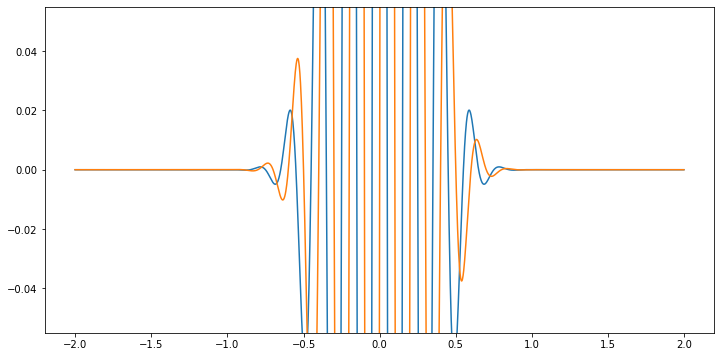

In [28]:
# setup figure

fig,ax = plt.subplots(1,figsize=(12,6))
plth1, = ax.plot(time,np.zeros(len(time)))
plth2, = ax.plot(time,np.zeros(len(time)))

# creat animation

ani = animation.FuncAnimation(fig,aframe,phases,interval=50,repeat=True)

In [30]:
ani

In [40]:
# parameters and initializations

a = np.linspace(-40,40,70)
b = np.linspace(-40,40,70)

mobtrans = np.zeros((len(a),len(b)),dtype='complex')
ts = np.linspace(.2,2,90)

# function that draws each frame

def aframe(t):

  

  for i,aa in enumerate(a):
    for j,bb in enumerate(b):

      
      z = np.complex(aa,bb)
      num = (t-1) + (t+1)*z
      den = (t+1) + (t-1)*z

      mobtrans[i,j] = num/den

      # update figure

      imh[0].set_data(np.real(mobtrans))
      imh[1].set_data(np.imag(mobtrans))
      imh[2].set_data(np.abs(mobtrans))

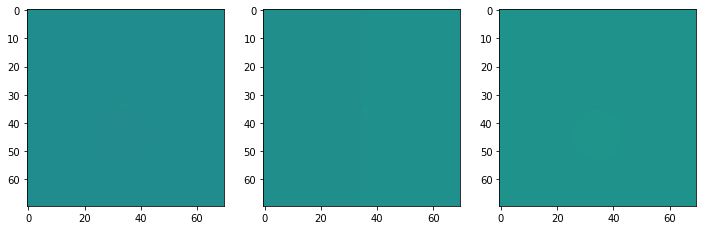

In [43]:
#setup figure

fig,axs = plt.subplots(1,3,figsize = (12,8))

imh = [0]*3
imh[0] = axs[0].imshow(np.zeros((len(a),len(b))),vmin = -50,vmax = 50)
imh[1] = axs[1].imshow(np.zeros((len(a),len(b))),vmin = -50,vmax = 50)
imh[2] = axs[2].imshow(np.zeros((len(a),len(b))),vmin = -50,vmax = 50)

ani = animation.FuncAnimation(fig,aframe,ts,interval = 50)
writergif = animation.PillowWriter(fps=60)
ani.save('Mobius.gif',writer = writergif)

In [42]:
ani

KeyboardInterrupt: ignored